# Imports
Importing the necessary packages to be used in this python file

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

# 1. Removing all Columns having MV

Reading the 'HousePrices.csv' file and storing it in a Dataframe

In [2]:
df1=pd.read_csv('HousePrices.csv')

Increasing the maximum number of rows and columns to '10000'

In [3]:
pd.options.display.max_rows=10000
pd.options.display.max_columns=10000

Getting the details of the dataframe's columns to search for abnormalities

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Some more data description to understand the data we received from the csv file

In [5]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Converting the following to object type variables

In [6]:
df1['MSSubClass']=df1['MSSubClass'].astype(object)
df1['OverallQual']=df1['OverallQual'].astype(object)
df1['OverallCond']=df1['OverallCond'].astype(object)

Getting the Dimensions of the Dataframe

In [7]:
df1.shape

(1460, 81)

In [8]:
df1=df1.dropna(axis=1)
df1.shape

(1460, 62)

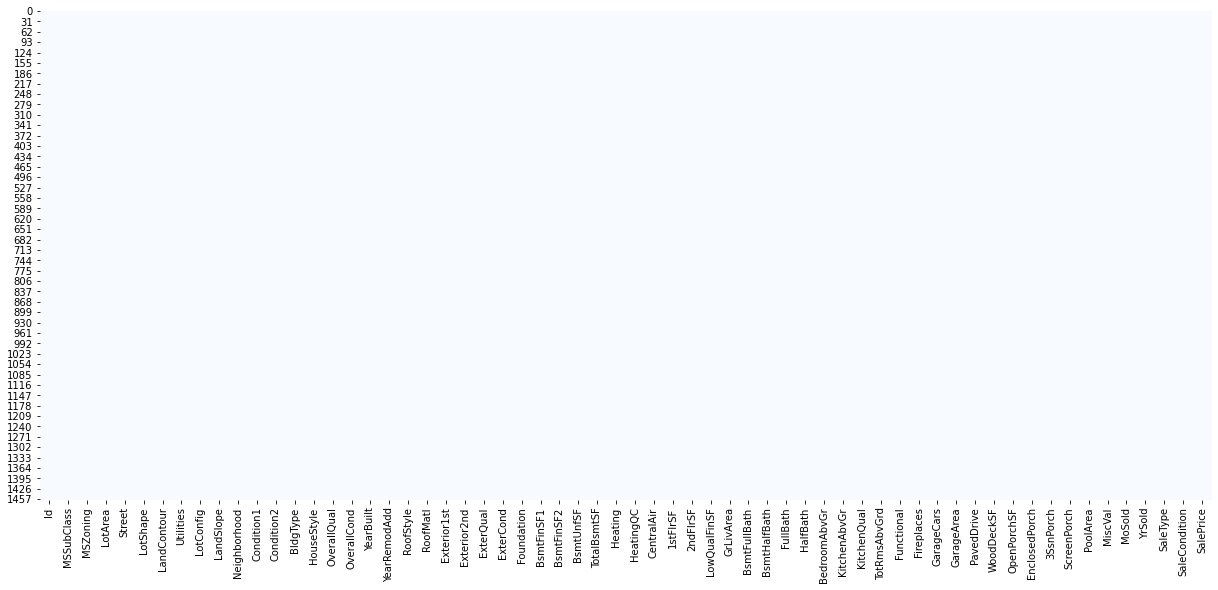

In [9]:
fig, ax = plt.subplots(figsize=(21,9))
sns.heatmap(df1.isna(),cbar=False,cmap="Blues")
plt.show()

In [10]:
#Storing categorized and numerical variables in different variables
df_cat=df1.select_dtypes(include=['object'])
df_num=df1.select_dtypes(exclude=['object'])

#Performing N-1 Dummy Encoding on categorized variables
df_cat_n=pd.get_dummies(df_cat,drop_first=True)

#Merging the two variables having numerical and n-1 categorised variables together
df_merge=pd.concat([df_num,df_cat_n],axis=1)

#Adding a Constant variable
df_merge=sm.add_constant(df_merge)

#Creating Target and Independent variables
df_target=df_merge['SalePrice']
df_ind=df_merge.drop(['SalePrice'], axis=1)

#Splitting Data into Training and Testing Data
x_train,x_test,y_train,y_test=train_test_split(df_ind, df_target, test_size=0.1, random_state=123)

model = sm.OLS(y_train,x_train,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     69.47
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:38:30   Log-Likelihood:                -14932.
No. Observations:                1314   AIC:                         3.029e+04
Df Residuals:                    1101   BIC:                         3.139e+04
Df Model:                         212                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -1.74e+06   1.08e+06     -1.609      0.108   -3.86e+06    3.82e+05
Id                        0.8737      1.615      0.541      0.589      -2.296       4.044
LotArea                   0.7669      0.118      6.494      0.000       0.535       0.999
YearBuilt               406.5523     83.681      4.858      0.000     242.360     570.744
YearRemodAdd             93.2807     57.501      1.622      0.105     -19.544     206.105
BsmtFinSF1               17.4205      2.111      8.254      0.000      13.279      21.562
BsmtFinSF2                6.8829      3.518      1.957      0.051      -0.019      13.785
BsmtUnfSF                -4.3133      2.048     -2.106      0.035      -8.332      -0.294
TotalBsmtSF              19.9900      3.452      5.792      0.000      13.218      26.762
1stFlrSF                 21.7283      6.392      3.399      0.001       9.187      34.269
2ndFlrSF                 32.4371      5.609      5.783      0.000      21.432      43.442
LowQualFinSF            -22.6614     14.474     -1.566      0.118     -51.060       5.738
GrLivArea                31.5038      5.815      5.418      0.000      20.095      42.913
BsmtFullBath           1670.6347   1979.887      0.844      0.399   -2214.144    5555.413
BsmtHalfBath           1230.8246   3190.923      0.386      0.700   -5030.153    7491.802
FullBath               2230.4029   2321.660      0.961      0.337   -2324.975    6785.780
HalfBath               -791.8500   2156.492     -0.367      0.714   -5023.148    3439.448
BedroomAbvGr          -2874.7772   1454.208     -1.977      0.048   -5728.109     -21.446
KitchenAbvGr          -2.252e+04   6901.737     -3.262      0.001   -3.61e+04   -8974.422
TotRmsAbvGrd            820.0705    996.036      0.823      0.410   -1134.273    2774.414
Fireplaces             3599.6758   1407.586      2.557      0.011     837.822    6361.530
GarageCars             2930.4354   2316.118      1.265      0.206   -1614.069    7474.940
GarageArea               16.3043      8.130      2.005      0.045       0.352      32.256
WoodDeckSF                7.9698      6.084      1.310      0.191      -3.969      19.908
OpenPorchSF               8.4269     12.115      0.696      0.487     -15.344      32.198
EnclosedPorch            12.8853     13.426      0.960      0.337     -13.457      39.228
3SsnPorch                48.5434     22.500      2.157      0.031       4.395      92.692
ScreenPorch              33.8464     13.193      2.566      0.010       7.961      59.732
PoolArea                 57.8195     18.193      3.178      0.002      22.122      93.517
MiscVal                   0.2386      1.413      0.169      0.866      -2.534       3.011
MoSold                 -441.7628    261.678     -1.688      0.092    -955.208      71.682
YrSold                 

In [11]:
# predict using Train set, 'SalePrice' using 'predict()' 
predict_train = model.predict(x_train)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_train = np.sqrt(mean_squared_error(predict_train,y_train)).round(2)

# predict using Test set, 'SalePrice' using 'predict()' 
predict_test = model.predict(x_test)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_test = np.sqrt(mean_squared_error(predict_test,y_test)).round(2)

### Storing the necessary details in another dataframe for further observations

In [12]:
df_results=pd.DataFrame(columns =["R-Squared", "Adjusted R-Squared", "RMSE Train","RMSE Test"])
Model='Removing all columns having MV'
rSquared=model.rsquared
adjRSquared=model.rsquared_adj
rmseTrain=rmse_train
rmseTest=rmse_test
df_results.loc[Model]=[rSquared,adjRSquared,rmseTrain,rmseTest]

In [13]:
df_results

,R-Squared,Adjusted R-Squared,RMSE Train,RMSE Test
Removing all columns having MV,0.930444,0.917051,20838.02,23034.95


# --------------------------------------------------------------------------------------------------------------------

# 1.1 Removing all Columns having MV and Performing Normalisation

In [14]:
df1_N=pd.read_csv('HousePrices.csv')

In [15]:
df1_N['MSSubClass']=df1_N['MSSubClass'].astype(object)
df1_N['OverallQual']=df1_N['OverallQual'].astype(object)
df1_N['OverallCond']=df1_N['OverallCond'].astype(object)

In [16]:
df1_N=df1_N.dropna(axis=1)
df1_N.shape

(1460, 62)

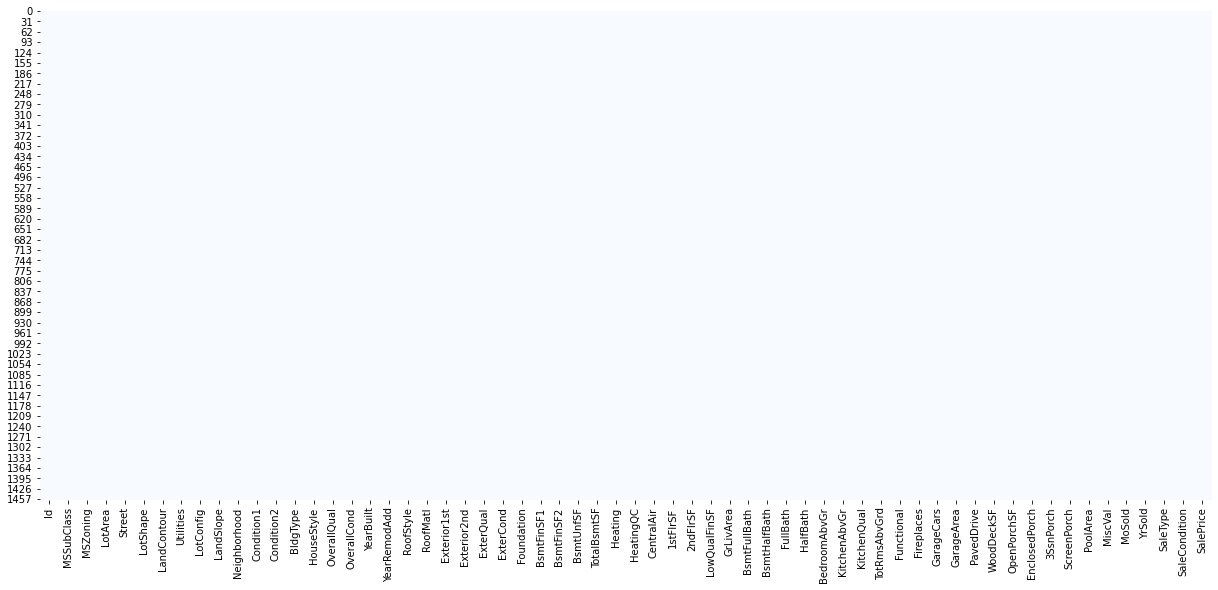

In [17]:
fig, ax = plt.subplots(figsize=(21,9))
sns.heatmap(df1_N.isna(),cbar=False,cmap="Blues")
plt.show()

In [18]:
df_cat=df1_N.select_dtypes(include=['object'])
df_num=df1_N.select_dtypes(exclude=['object'])

In [19]:
df_num_normalisation = pd.DataFrame(MinMaxScaler().fit_transform(df_num.values), columns=df_num.columns, index=df_num.index)
df_num=df_num_normalisation

In [20]:
#N-1 Dummy Encoding
df_cat_n=pd.get_dummies(df_cat,drop_first=True)

In [21]:
df_merge=pd.concat([df_num,df_cat_n],axis=1)

In [22]:
#Adding a constant variable
df_merge=sm.add_constant(df_merge)

In [23]:
df_ind=df_merge.drop(['SalePrice'], axis=1)

In [24]:
df_target=df_merge['SalePrice']

In [25]:
#Splitting Data into Training and Testing Data
x_train,x_test,y_train,y_test=train_test_split(df_ind, df_target, test_size=0.1, random_state=123)

model = sm.OLS(y_train,x_train,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     69.47
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:38:32   Log-Likelihood:                 2790.5
No. Observations:                1314   AIC:                            -5155.
Df Residuals:                    1101   BIC:                            -4051.
Df Model:                         212                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.0241      0.094    -10.952      0.000      -1.208      -0.841
Id                        0.0018      0.003      0.541      0.589      -0.005       0.008
LotArea                   0.2278      0.035      6.494      0.000       0.159       0.297
YearBuilt                 0.0779      0.016      4.858      0.000       0.046       0.109
YearRemodAdd              0.0078      0.005      1.622      0.105      -0.002       0.017
BsmtFinSF1                0.1569      0.019      8.262      0.000       0.120       0.194
BsmtFinSF2                0.0194      0.010      1.997      0.046       0.000       0.038
BsmtUnfSF                -0.0055      0.008     -0.659      0.510      -0.022       0.011
TotalBsmtSF               0.1475      0.020      7.306      0.000       0.108       0.187
1stFlrSF                  0.1717      0.021      8.137      0.000       0.130       0.213
2ndFlrSF                  0.1121      0.014      7.929      0.000       0.084       0.140
LowQualFinSF             -0.0127      0.015     -0.825      0.410      -0.043       0.018
GrLivArea                 0.1832      0.016     11.146      0.000       0.151       0.215
BsmtFullBath              0.0070      0.008      0.844      0.399      -0.009       0.023
BsmtHalfBath              0.0034      0.009      0.386      0.700      -0.014       0.021
FullBath                  0.0093      0.010      0.961      0.337      -0.010       0.028
HalfBath                 -0.0022      0.006     -0.367      0.714      -0.014       0.010
BedroomAbvGr             -0.0319      0.016     -1.977      0.048      -0.064      -0.000
KitchenAbvGr             -0.0938      0.029     -3.262      0.001      -0.150      -0.037
TotRmsAbvGrd              0.0137      0.017      0.823      0.410      -0.019       0.046
Fireplaces                0.0150      0.006      2.557      0.011       0.003       0.027
GarageCars                0.0163      0.013      1.265      0.206      -0.009       0.042
GarageArea                0.0321      0.016      2.005      0.045       0.001       0.064
WoodDeckSF                0.0095      0.007      1.310      0.191      -0.005       0.024
OpenPorchSF               0.0064      0.009      0.696      0.487      -0.012       0.024
EnclosedPorch             0.0099      0.010      0.960      0.337      -0.010       0.030
3SsnPorch                 0.0342      0.016      2.157      0.031       0.003       0.065
ScreenPorch               0.0226      0.009      2.566      0.010       0.005       0.040
PoolArea                  0.0593      0.019      3.178      0.002       0.023       0.096
MiscVal                   0.0051      0.030      0.169      0.866      -0.055       0.065
MoSold                   -0.0067      0.004     -1.688      0.092      -0.015       0.001
YrSold                 

In [26]:
# predict using Train set, 'SalePrice' using 'predict()' 
predict_train = model.predict(x_train)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_train = np.sqrt(mean_squared_error(predict_train,y_train)).round(2)

# predict using Test set, 'SalePrice' using 'predict()' 
predict_test = model.predict(x_test)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_test = np.sqrt(mean_squared_error(predict_test,y_test)).round(2)

### Storing the necessary details in another dataframe for further observations

In [27]:
Model='Removing all columns having MV(Normalisation)'
rSquared=model.rsquared
adjRSquared=model.rsquared_adj
rmseTrain=rmse_train
rmseTest=rmse_test
df_results.loc[Model]=[rSquared,adjRSquared,rmseTrain,rmseTest]

In [28]:
df_results

,R-Squared,Adjusted R-Squared,RMSE Train,RMSE Test
Removing all columns having MV,0.930444,0.917051,20838.02,23034.95
Removing all columns having MV(Normalisation),0.930444,0.917051,0.03,0.03


# --------------------------------------------------------------------------------------------------------------------

# 1.2 Removing all Columns having MV and Performing standardization

In [29]:
df1_S=pd.read_csv('HousePrices.csv')

In [30]:
df1_S['MSSubClass']=df1_S['MSSubClass'].astype(object)
df1_S['OverallQual']=df1_S['OverallQual'].astype(object)
df1_S['OverallCond']=df1_S['OverallCond'].astype(object)

In [31]:
df1_S=df1_S.dropna(axis=1)
df1_S.shape

(1460, 62)

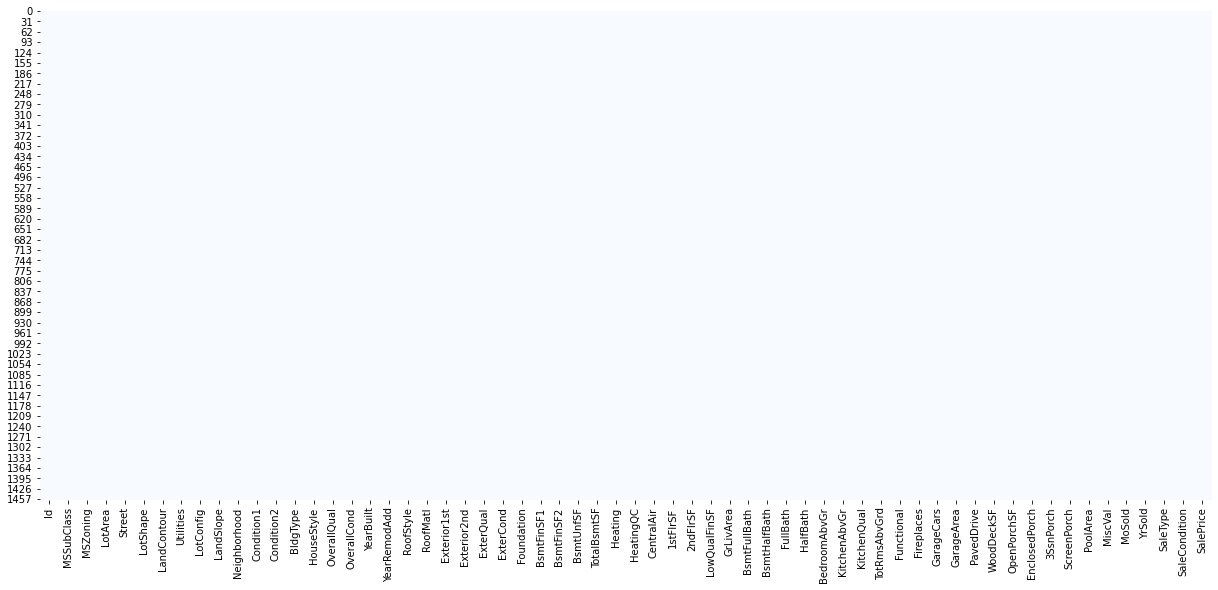

In [32]:
fig, ax = plt.subplots(figsize=(21,9))
sns.heatmap(df1_S.isna(),cbar=False,cmap="Blues")
plt.show()

In [33]:
df_cat=df1_S.select_dtypes(include=['object'])
df_num=df1_S.select_dtypes(exclude=['object'])

In [34]:
df_num_standardization = pd.DataFrame(StandardScaler().fit_transform(df_num.values), columns=df_num.columns, index=df_num.index)
df_num=df_num_standardization

In [35]:
#N-1 Dummy Encoding
df_cat_n=pd.get_dummies(df_cat,drop_first=True)

In [36]:
df_merge=pd.concat([df_num,df_cat_n],axis=1)

In [37]:
#Adding a constant variable
df_merge=sm.add_constant(df_merge)

In [38]:
df_ind=df_merge.drop(['SalePrice'], axis=1)

In [39]:
df_target=df_merge['SalePrice']

In [40]:
#Splitting Data into Training and Testing Data
x_train,x_test,y_train,y_test=train_test_split(df_ind, df_target, test_size=0.1, random_state=123)

model = sm.OLS(y_train,x_train,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     69.47
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:38:33   Log-Likelihood:                -106.47
No. Observations:                1314   AIC:                             638.9
Df Residuals:                    1101   BIC:                             1742.
Df Model:                         212                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -9.4204      0.835    -11.280      0.000     -11.059      -7.782
Id                        0.0046      0.009      0.541      0.589      -0.012       0.021
LotArea                   0.0964      0.015      6.494      0.000       0.067       0.125
YearBuilt                 0.1546      0.032      4.858      0.000       0.092       0.217
YearRemodAdd              0.0242      0.015      1.622      0.105      -0.005       0.054
BsmtFinSF1                0.1082      0.011      9.516      0.000       0.086       0.131
BsmtFinSF2                0.0169      0.009      1.855      0.064      -0.001       0.035
BsmtUnfSF                -0.0161      0.010     -1.605      0.109      -0.036       0.004
TotalBsmtSF               0.1025      0.017      6.049      0.000       0.069       0.136
1stFlrSF                  0.1004      0.021      4.880      0.000       0.060       0.141
2ndFlrSF                  0.1722      0.020      8.503      0.000       0.132       0.212
LowQualFinSF             -0.0145      0.012     -1.234      0.217      -0.038       0.009
GrLivArea                 0.2156      0.016     13.596      0.000       0.184       0.247
BsmtFullBath              0.0109      0.013      0.844      0.399      -0.014       0.036
BsmtHalfBath              0.0037      0.010      0.386      0.700      -0.015       0.023
FullBath                  0.0155      0.016      0.961      0.337      -0.016       0.047
HalfBath                 -0.0050      0.014     -0.367      0.714      -0.032       0.022
BedroomAbvGr             -0.0295      0.015     -1.977      0.048      -0.059      -0.000
KitchenAbvGr             -0.0625      0.019     -3.262      0.001      -0.100      -0.025
TotRmsAbvGrd              0.0168      0.020      0.823      0.410      -0.023       0.057
Fireplaces                0.0292      0.011      2.557      0.011       0.007       0.052
GarageCars                0.0276      0.022      1.265      0.206      -0.015       0.070
GarageArea                0.0439      0.022      2.005      0.045       0.001       0.087
WoodDeckSF                0.0126      0.010      1.310      0.191      -0.006       0.031
OpenPorchSF               0.0070      0.010      0.696      0.487      -0.013       0.027
EnclosedPorch             0.0099      0.010      0.960      0.337      -0.010       0.030
3SsnPorch                 0.0179      0.008      2.157      0.031       0.002       0.034
ScreenPorch               0.0238      0.009      2.566      0.010       0.006       0.042
PoolArea                  0.0292      0.009      3.178      0.002       0.011       0.047
MiscVal                   0.0015      0.009      0.169      0.866      -0.016       0.019
MoSold                   -0.0150      0.009     -1.688      0.092      -0.033       0.002
YrSold                 

In [41]:
# predict using Train set, 'SalePrice' using 'predict()' 
predict_train = model.predict(x_train)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_train = np.sqrt(mean_squared_error(predict_train,y_train)).round(2)

# predict using Test set, 'SalePrice' using 'predict()' 
predict_test = model.predict(x_test)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_test = np.sqrt(mean_squared_error(predict_test,y_test)).round(2)

### Storing the necessary details in another dataframe for further observations

In [42]:
Model='Removing all columns having MV(Standardization)'
rSquared=model.rsquared
adjRSquared=model.rsquared_adj
rmseTrain=rmse_train
rmseTest=rmse_test
df_results.loc[Model]=[rSquared,adjRSquared,rmseTrain,rmseTest]

In [43]:
df_results

,R-Squared,Adjusted R-Squared,RMSE Train,RMSE Test
Removing all columns having MV,0.930444,0.917051,20838.02,23034.95
Removing all columns having MV(Normalisation),0.930444,0.917051,0.03,0.03
Removing all columns having MV(Standardization),0.930444,0.917051,0.26,0.29


# --------------------------------------------------------------------------------------------------------------------

# 2. Replacing all MV with proper values

In this model we have repplaced NaN values from a int or float datatype variables with 0(zero) and any other object datatype variables with a 'NA'(Not Applicable/Not Available)(string).

Reading the 'HousePrices.csv' file and storing it in a Dataframe

In [44]:
df2=pd.read_csv('HousePrices.csv')

Converting the following to object type variables

In [45]:
df2['MSSubClass']=df2['MSSubClass'].astype(object)
df2['OverallQual']=df2['OverallQual'].astype(object)
df2['OverallCond']=df2['OverallCond'].astype(object)

Getting the Dimensions of the Dataframe

In [46]:
df2.shape

(1460, 81)

Storing the percentage values of missing values greater then 0 in Descending order

In [47]:
#Creating a New Dataframe to store MV in
df2_MV=pd.DataFrame()

#Creating new columns to add Number and Percentage of Missing Values for the variables
df2_MV['Number of MV'] = df2.isna().sum()[df2.isna().sum()>0]
df2_MV['Percentage of MV'] = (df2.isna().mean()* 100).round(2)[(df2.isna().mean()* 100).round(2)>0]
df2_MV['DataType']= df2.dtypes
df2_MV

,Number of MV,Percentage of MV,DataType
LotFrontage,259,17.74,float64
Alley,1369,93.77,object
MasVnrType,8,0.55,object
MasVnrArea,8,0.55,float64
BsmtQual,37,2.53,object
BsmtCond,37,2.53,object
BsmtExposure,38,2.60,object
BsmtFinType1,37,2.53,object
BsmtFinType2,38,2.60,object
Electrical,1,0.07,object


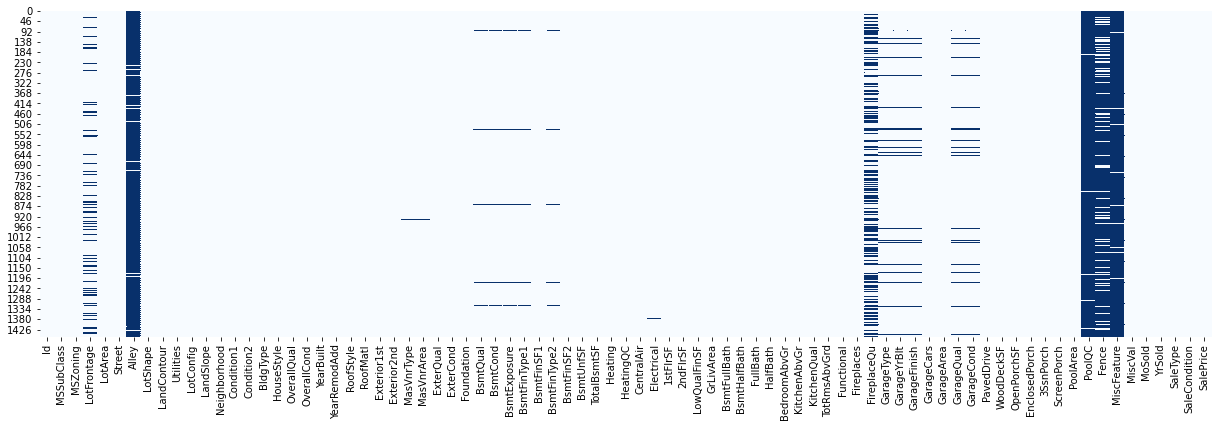

In [48]:
fig, ax = plt.subplots(figsize=(21,6))
sns.heatmap(df2.isna(),cbar=False,cmap="Blues")
plt.show()

We make the necessary changes for all MV columns in the Dataframe df2 with respect to object and other datatypes, respectively.

In [49]:
for y in df2_MV.iterrows():
    if y[1][2] == 'object' :
        df2[y[0]]= df2[y[0]].fillna('NA')
    else:
        df2[y[0]]= df2[y[0]].fillna(0)

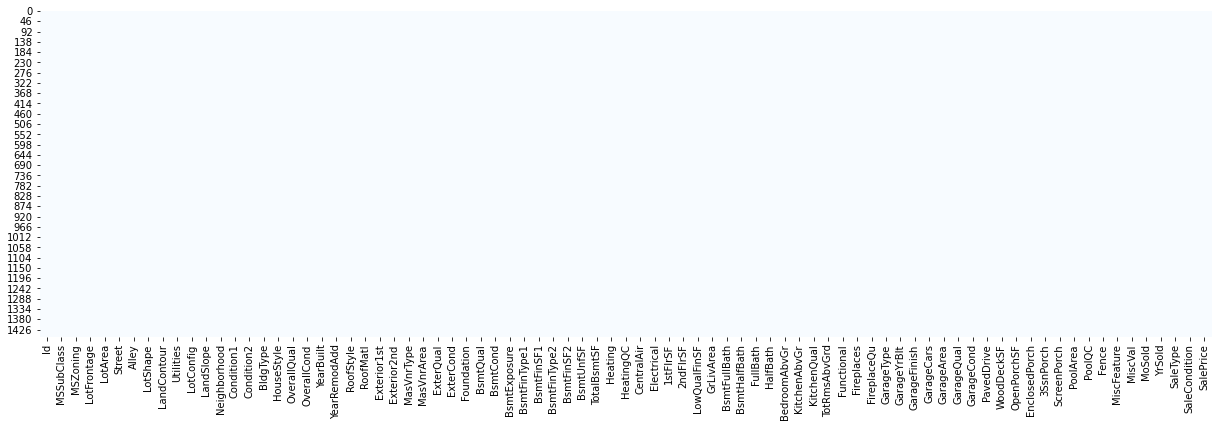

In [50]:
fig, ax = plt.subplots(figsize=(21,6))
sns.heatmap(df2.isna(),cbar=False,cmap="Blues")
plt.show()

Creating model from the data

In [51]:
#Storing categorized and numerical variables in different variables
df_cat=df2.select_dtypes(include=['object'])
df_num=df2.select_dtypes(exclude=['object'])

#Performing N-1 Dummy Encoding on categorized variables
df_cat_n=pd.get_dummies(df_cat,drop_first=True)

#Merging the two variables having numerical and n-1 categorised variables together
df_merge=pd.concat([df_num,df_cat_n],axis=1)

#Adding a Constant variable
df_merge=sm.add_constant(df_merge)

#Creating Target and Independent variables
df_target=df_merge['SalePrice']
df_ind=df_merge.drop(['SalePrice'], axis=1)

#Splitting Data into Training and Testing Data
x_train,x_test,y_train,y_test=train_test_split(df_ind, df_target, test_size=0.1, random_state=123)

model = sm.OLS(y_train,x_train,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     56.23
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:38:35   Log-Likelihood:                -14860.
No. Observations:                1314   AIC:                         3.028e+04
Df Residuals:                    1036   BIC:                         3.172e+04
Df Model:                         277                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.587e+05   1.02e+06     -0.841      0.400   -2.86e+06    1.14e+06
Id                        0.8842      1.627      0.544      0.587      -2.308       4.076
LotFrontage              11.1692     24.999      0.447      0.655     -37.886      60.225
LotArea                   0.7464      0.121      6.172      0.000       0.509       0.984
YearBuilt               346.2637     88.622      3.907      0.000     172.365     520.162
YearRemodAdd             99.1142     60.616      1.635      0.102     -19.829     218.057
MasVnrArea               19.7504      6.376      3.098      0.002       7.239      32.261
BsmtFinSF1               16.5057      3.042      5.426      0.000      10.537      22.474
BsmtFinSF2                7.6619      6.285      1.219      0.223      -4.672      19.995
BsmtUnfSF                -2.1565      2.933     -0.735      0.462      -7.913       3.600
TotalBsmtSF              22.0111      4.429      4.969      0.000      13.319      30.703
1stFlrSF                 20.6242      6.970      2.959      0.003       6.947      34.302
2ndFlrSF                 37.4596      5.905      6.343      0.000      25.872      49.047
LowQualFinSF            -33.1214     15.034     -2.203      0.028     -62.622      -3.621
GrLivArea                24.9624      6.181      4.039      0.000      12.834      37.091
BsmtFullBath           1554.7545   2065.896      0.753      0.452   -2499.063    5608.572
BsmtHalfBath            338.4564   3196.724      0.106      0.916   -5934.335    6611.248
FullBath               2556.8480   2366.332      1.081      0.280   -2086.502    7200.198
HalfBath               1169.2657   2214.578      0.528      0.598   -3176.304    5514.835
BedroomAbvGr          -1846.7551   1492.784     -1.237      0.216   -4775.981    1082.471
KitchenAbvGr           -2.11e+04   7300.497     -2.891      0.004   -3.54e+04   -6779.047
TotRmsAbvGrd           1143.3693   1015.051      1.126      0.260    -848.422    3135.160
Fireplaces             7040.8786   2818.797      2.498      0.013    1509.676    1.26e+04
GarageYrBlt               9.8062     63.932      0.153      0.878    -115.646     135.258
GarageCars             2689.0469   2476.150      1.086      0.278   -2169.794    7547.887
GarageArea               17.5697      8.721      2.015      0.044       0.457      34.682
WoodDeckSF                9.7990      6.232      1.572      0.116      -2.430      22.028
OpenPorchSF               4.8304     12.342      0.391      0.696     -19.388      29.049
EnclosedPorch            12.0805     13.659      0.884      0.377     -14.722      38.883
3SsnPorch                51.5278     22.566      2.283      0.023       7.247      95.808
ScreenPorch              40.4236     13.533      2.987      0.003      13.869      66.978
PoolArea               

In [52]:
# predict using Train set, 'SalePrice' using 'predict()' 
predict_train = model.predict(x_train)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_train = np.sqrt(mean_squared_error(predict_train,y_train)).round(2)

# predict using Test set, 'SalePrice' using 'predict()' 
predict_test = model.predict(x_test)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_test = np.sqrt(mean_squared_error(predict_test,y_test)).round(2)

In [53]:
Model='Replacing all MV with proper values'
rSquared=model.rsquared
adjRSquared=model.rsquared_adj
rmseTrain=rmse_train
rmseTest=rmse_test
df_results.loc[Model]=[rSquared,adjRSquared,rmseTrain,rmseTest]
df_results

,R-Squared,Adjusted R-Squared,RMSE Train,RMSE Test
Removing all columns having MV,0.930444,0.917051,20838.02,23034.95
Removing all columns having MV(Normalisation),0.930444,0.917051,0.03,0.03
Removing all columns having MV(Standardization),0.930444,0.917051,0.26,0.29
Replacing all MV with proper values,0.937634,0.920959,19731.59,22490.55


# --------------------------------------------------------------------------------------------------------------------

# 2.1 Replacing all MV with proper values and performing Normalisation

In this model we have repplaced NaN values from a int or float datatype variables with 0(zero) and any other object datatype variables with a 'NA'(Not Applicable/Not Available)(string). Afterwards we perform Normalisation on the model as well.

Reading the 'HousePrices.csv' file and storing it in a Dataframe

In [54]:
df2_N=pd.read_csv('HousePrices.csv')

Converting the following to object type variables

In [55]:
df2_N['MSSubClass']=df2_N['MSSubClass'].astype(object)
df2_N['OverallQual']=df2_N['OverallQual'].astype(object)
df2_N['OverallCond']=df2_N['OverallCond'].astype(object)

Getting the Dimensions of the Dataframe

In [56]:
df2_N.shape

(1460, 81)

Storing the percentage values of missing values greater then 0 in Descending order

In [57]:
#Creating a New Dataframe to store MV in
df2_N_MV=pd.DataFrame()

#Creating new columns to add Number and Percentage of Missing Values for the variables
df2_N_MV['Number of MV'] = df2_N.isna().sum()[df2_N.isna().sum()>0]
df2_N_MV['Percentage of MV'] = (df2_N.isna().mean()* 100).round(2)[(df2_N.isna().mean()* 100).round(2)>0]
df2_N_MV['DataType']= df2_N.dtypes
df2_N_MV

,Number of MV,Percentage of MV,DataType
LotFrontage,259,17.74,float64
Alley,1369,93.77,object
MasVnrType,8,0.55,object
MasVnrArea,8,0.55,float64
BsmtQual,37,2.53,object
BsmtCond,37,2.53,object
BsmtExposure,38,2.60,object
BsmtFinType1,37,2.53,object
BsmtFinType2,38,2.60,object
Electrical,1,0.07,object


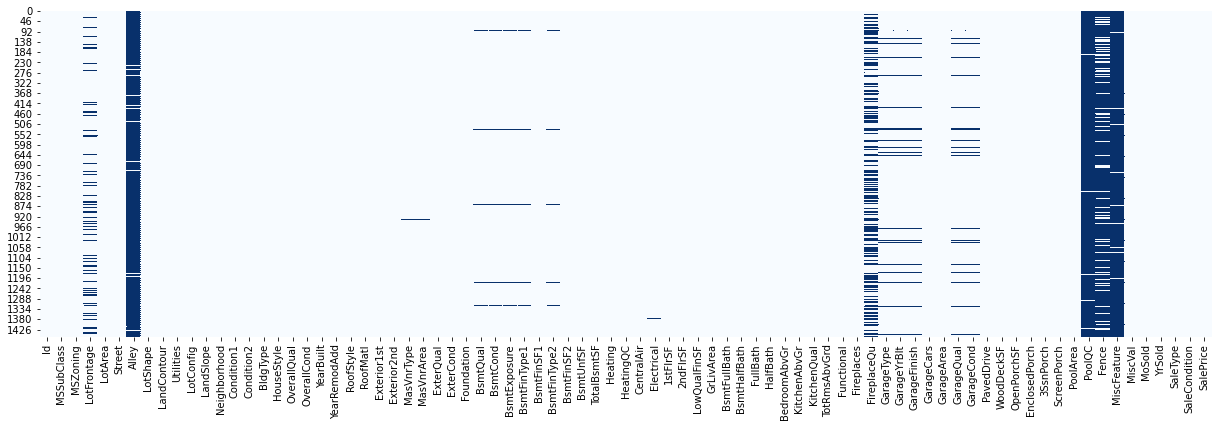

In [58]:
fig, ax = plt.subplots(figsize=(21,6))
sns.heatmap(df2_N.isna(),cbar=False,cmap="Blues")
plt.show()

We make the necessary changes for all MV columns in the Dataframe df2 with respect to object and other datatypes, respectively.

In [59]:
for y in df2_N_MV.iterrows():
    if y[1][2] == 'object' :
        df2_N[y[0]]= df2_N[y[0]].fillna('NA')
    else:
        df2_N[y[0]]= df2_N[y[0]].fillna(0)

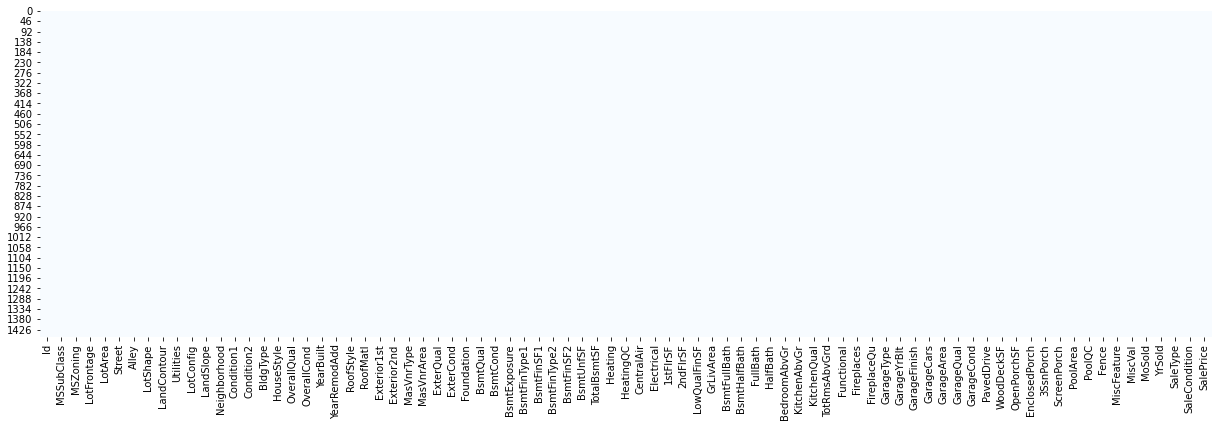

In [60]:
fig, ax = plt.subplots(figsize=(21,6))
sns.heatmap(df2_N.isna(),cbar=False,cmap="Blues")
plt.show()

Creating model from the data

In [61]:
#Storing categorized and numerical variables in different variables
df_cat=df2_N.select_dtypes(include=['object'])
df_num=df2_N.select_dtypes(exclude=['object'])

#Performing Normalisation on the data in df_num(numerical data)
df_num_normalisation = pd.DataFrame(MinMaxScaler().fit_transform(df_num.values), columns=df_num.columns, index=df_num.index)
df_num=df_num_normalisation

#Performing N-1 Dummy Encoding on categorized variables
df_cat_n=pd.get_dummies(df_cat,drop_first=True)

#Merging the two variables having numerical and n-1 categorised variables together
df_merge=pd.concat([df_num,df_cat_n],axis=1)

#Adding a Constant variable
df_merge=sm.add_constant(df_merge)

#Creating Target and Independent variables
df_target=df_merge['SalePrice']
df_ind=df_merge.drop(['SalePrice'], axis=1)

#Splitting Data into Training and Testing Data
x_train,x_test,y_train,y_test=train_test_split(df_ind, df_target, test_size=0.1, random_state=123)

model = sm.OLS(y_train,x_train,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     56.23
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:38:37   Log-Likelihood:                 2862.2
No. Observations:                1314   AIC:                            -5168.
Df Residuals:                    1036   BIC:                            -3728.
Df Model:                         277                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.1868      0.247     -4.796      0.000      -1.672      -0.701
Id                        0.0018      0.003      0.544      0.587      -0.005       0.008
LotFrontage               0.0049      0.011      0.447      0.655      -0.016       0.026
LotArea                   0.2218      0.036      6.172      0.000       0.151       0.292
YearBuilt                 0.0664      0.017      3.907      0.000       0.033       0.100
YearRemodAdd              0.0083      0.005      1.635      0.102      -0.002       0.018
MasVnrArea                0.0439      0.014      3.098      0.002       0.016       0.072
BsmtFinSF1                0.1591      0.023      6.859      0.000       0.114       0.205
BsmtFinSF2                0.0234      0.017      1.379      0.168      -0.010       0.057
BsmtUnfSF                 0.0053      0.010      0.515      0.606      -0.015       0.025
TotalBsmtSF               0.1546      0.024      6.325      0.000       0.107       0.203
1stFlrSF                  0.1438      0.023      6.282      0.000       0.099       0.189
2ndFlrSF                  0.1164      0.017      7.049      0.000       0.084       0.149
LowQualFinSF             -0.0238      0.016     -1.478      0.140      -0.055       0.008
GrLivArea                 0.1608      0.018      9.124      0.000       0.126       0.195
BsmtFullBath              0.0065      0.009      0.753      0.452      -0.010       0.023
BsmtHalfBath              0.0009      0.009      0.106      0.916      -0.016       0.018
FullBath                  0.0107      0.010      1.081      0.280      -0.009       0.030
HalfBath                  0.0032      0.006      0.528      0.598      -0.009       0.015
BedroomAbvGr             -0.0205      0.017     -1.237      0.216      -0.053       0.012
KitchenAbvGr             -0.0879      0.030     -2.891      0.004      -0.148      -0.028
TotRmsAbvGrd              0.0191      0.017      1.126      0.260      -0.014       0.052
Fireplaces                0.0293      0.012      2.498      0.013       0.006       0.052
GarageYrBlt               0.0274      0.178      0.153      0.878      -0.323       0.378
GarageCars                0.0149      0.014      1.086      0.278      -0.012       0.042
GarageArea                0.0346      0.017      2.015      0.044       0.001       0.068
WoodDeckSF                0.0117      0.007      1.572      0.116      -0.003       0.026
OpenPorchSF               0.0037      0.009      0.391      0.696      -0.015       0.022
EnclosedPorch             0.0093      0.010      0.884      0.377      -0.011       0.030
3SsnPorch                 0.0364      0.016      2.283      0.023       0.005       0.068
ScreenPorch               0.0269      0.009      2.987      0.003       0.009       0.045
PoolArea               

In [62]:
# predict using Train set, 'SalePrice' using 'predict()' 
predict_train = model.predict(x_train)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_train = np.sqrt(mean_squared_error(predict_train,y_train)).round(2)

# predict using Test set, 'SalePrice' using 'predict()' 
predict_test = model.predict(x_test)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_test = np.sqrt(mean_squared_error(predict_test,y_test)).round(2)

In [63]:
Model='Replacing all MV with proper values(Normalisation'
rSquared=model.rsquared
adjRSquared=model.rsquared_adj
rmseTrain=rmse_train
rmseTest=rmse_test
df_results.loc[Model]=[rSquared,adjRSquared,rmseTrain,rmseTest]
df_results

,R-Squared,Adjusted R-Squared,RMSE Train,RMSE Test
Removing all columns having MV,0.930444,0.917051,20838.02,23034.95
Removing all columns having MV(Normalisation),0.930444,0.917051,0.03,0.03
Removing all columns having MV(Standardization),0.930444,0.917051,0.26,0.29
Replacing all MV with proper values,0.937634,0.920959,19731.59,22490.55
Replacing all MV with proper values(Normalisation,0.937634,0.920959,0.03,0.03


# --------------------------------------------------------------------------------------------------------------------

# 2.2 Replacing all MV with proper values and performing Normalisation

In this model we have repplaced NaN values from a int or float datatype variables with 0(zero) and any other object datatype variables with a 'NA'(Not Applicable/Not Available)(string). Afterwards we perform Normalisation on the model as well.

Reading the 'HousePrices.csv' file and storing it in a Dataframe

In [64]:
df2_S=pd.read_csv('HousePrices.csv')

Converting the following to object type variables

In [65]:
df2_S['MSSubClass']=df2_S['MSSubClass'].astype(object)
df2_S['OverallQual']=df2_S['OverallQual'].astype(object)
df2_S['OverallCond']=df2_S['OverallCond'].astype(object)

Getting the Dimensions of the Dataframe

In [66]:
df2_S.shape

(1460, 81)

Storing the percentage values of missing values greater then 0 in Descending order

In [67]:
#Creating a New Dataframe to store MV in
df2_S_MV=pd.DataFrame()

#Creating new columns to add Number and Percentage of Missing Values for the variables
df2_S_MV['Number of MV'] = df2_S.isna().sum()[df2_S.isna().sum()>0]
df2_S_MV['Percentage of MV'] = (df2_S.isna().mean()* 100).round(2)[(df2_S.isna().mean()* 100).round(2)>0]
df2_S_MV['DataType']= df2_S.dtypes
df2_S_MV

,Number of MV,Percentage of MV,DataType
LotFrontage,259,17.74,float64
Alley,1369,93.77,object
MasVnrType,8,0.55,object
MasVnrArea,8,0.55,float64
BsmtQual,37,2.53,object
BsmtCond,37,2.53,object
BsmtExposure,38,2.60,object
BsmtFinType1,37,2.53,object
BsmtFinType2,38,2.60,object
Electrical,1,0.07,object


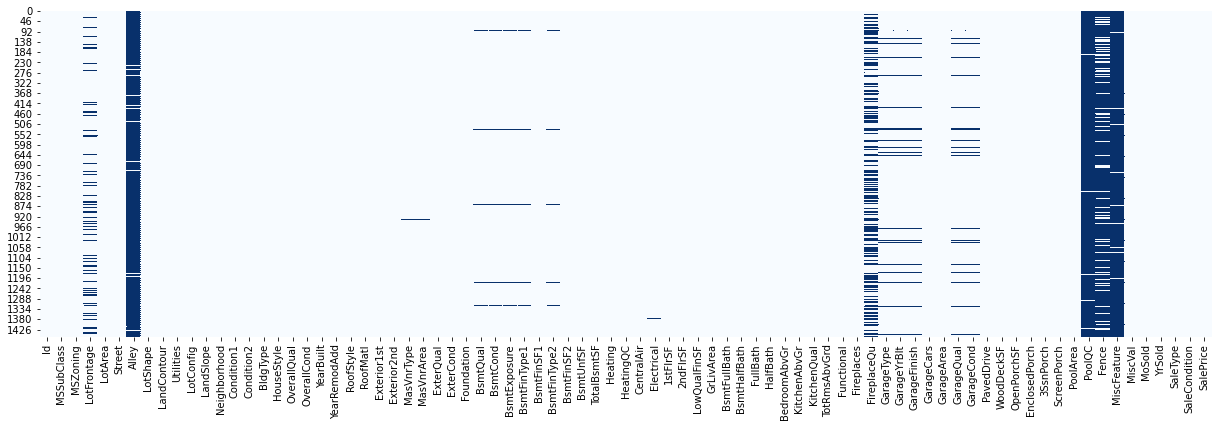

In [68]:
fig, ax = plt.subplots(figsize=(21,6))
sns.heatmap(df2_S.isna(),cbar=False,cmap="Blues")
plt.show()

We make the necessary changes for all MV columns in the Dataframe df2 with respect to object and other datatypes, respectively.

In [69]:
for y in df2_S_MV.iterrows():
    if y[1][2] == 'object' :
        df2_S[y[0]]= df2_S[y[0]].fillna('NA')
    else:
        df2_S[y[0]]= df2_S[y[0]].fillna(0)

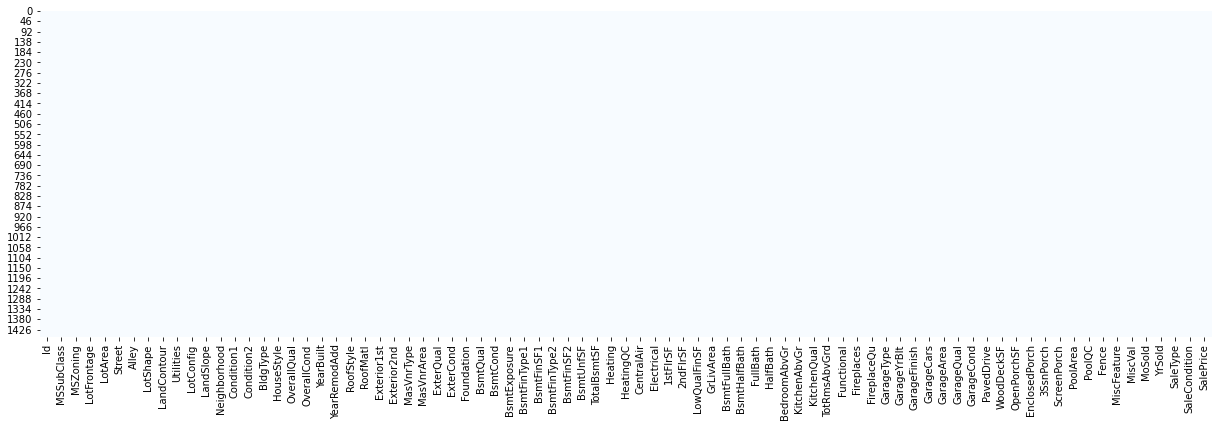

In [70]:
fig, ax = plt.subplots(figsize=(21,6))
sns.heatmap(df2_S.isna(),cbar=False,cmap="Blues")
plt.show()

Creating model from the data

In [71]:
#Storing categorized and numerical variables in different variables
df_cat=df2_S.select_dtypes(include=['object'])
df_num=df2_S.select_dtypes(exclude=['object'])

#Performing Standardization on the data in df_num(numerical data)
df_num_standardization = pd.DataFrame(StandardScaler().fit_transform(df_num.values), columns=df_num.columns, index=df_num.index)
df_num=df_num_standardization

#Performing N-1 Dummy Encoding on categorized variables
df_cat_n=pd.get_dummies(df_cat,drop_first=True)

#Merging the two variables having numerical and n-1 categorised variables together
df_merge=pd.concat([df_num,df_cat_n],axis=1)

#Adding a Constant variable
df_merge=sm.add_constant(df_merge)

#Creating Target and Independent variables
df_target=df_merge['SalePrice']
df_ind=df_merge.drop(['SalePrice'], axis=1)

#Splitting Data into Training and Testing Data
x_train,x_test,y_train,y_test=train_test_split(df_ind, df_target, test_size=0.1, random_state=123)

model = sm.OLS(y_train,x_train,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     56.23
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:38:38   Log-Likelihood:                -34.780
No. Observations:                1314   AIC:                             625.6
Df Residuals:                    1036   BIC:                             2066.
Df Model:                         277                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -10.6376      1.750     -6.079      0.000     -14.071      -7.204
Id                        0.0047      0.009      0.544      0.587      -0.012       0.022
LotFrontage               0.0049      0.011      0.447      0.655      -0.017       0.026
LotArea                   0.0938      0.015      6.172      0.000       0.064       0.124
YearBuilt                 0.1316      0.034      3.907      0.000       0.066       0.198
YearRemodAdd              0.0258      0.016      1.635      0.102      -0.005       0.057
MasVnrArea                0.0449      0.015      3.098      0.002       0.016       0.073
BsmtFinSF1                0.1042      0.014      7.319      0.000       0.076       0.132
BsmtFinSF2                0.0189      0.016      1.161      0.246      -0.013       0.051
BsmtUnfSF                -0.0028      0.012     -0.229      0.819      -0.027       0.021
TotalBsmtSF               0.1125      0.020      5.513      0.000       0.072       0.152
1stFlrSF                  0.0748      0.023      3.286      0.001       0.030       0.119
2ndFlrSF                  0.1770      0.024      7.477      0.000       0.131       0.223
LowQualFinSF             -0.0235      0.012     -1.920      0.055      -0.047       0.001
GrLivArea                 0.1999      0.017     11.451      0.000       0.166       0.234
BsmtFullBath              0.0102      0.013      0.753      0.452      -0.016       0.037
BsmtHalfBath              0.0010      0.010      0.106      0.916      -0.018       0.020
FullBath                  0.0177      0.016      1.081      0.280      -0.014       0.050
HalfBath                  0.0074      0.014      0.528      0.598      -0.020       0.035
BedroomAbvGr             -0.0190      0.015     -1.237      0.216      -0.049       0.011
KitchenAbvGr             -0.0585      0.020     -2.891      0.004      -0.098      -0.019
TotRmsAbvGrd              0.0234      0.021      1.126      0.260      -0.017       0.064
Fireplaces                0.0571      0.023      2.498      0.013       0.012       0.102
GarageYrBlt               0.0560      0.365      0.153      0.878      -0.660       0.772
GarageCars                0.0253      0.023      1.086      0.278      -0.020       0.071
GarageArea                0.0473      0.023      2.015      0.044       0.001       0.093
WoodDeckSF                0.0155      0.010      1.572      0.116      -0.004       0.035
OpenPorchSF               0.0040      0.010      0.391      0.696      -0.016       0.024
EnclosedPorch             0.0093      0.011      0.884      0.377      -0.011       0.030
3SsnPorch                 0.0190      0.008      2.283      0.023       0.003       0.035
ScreenPorch               0.0284      0.009      2.987      0.003       0.010       0.047
PoolArea               

In [72]:
# predict using Train set, 'SalePrice' using 'predict()' 
predict_train = model.predict(x_train)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_train = np.sqrt(mean_squared_error(predict_train,y_train)).round(2)

# predict using Test set, 'SalePrice' using 'predict()' 
predict_test = model.predict(x_test)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_test = np.sqrt(mean_squared_error(predict_test,y_test)).round(2)

In [73]:
Model='Replacing all MV with proper values(Standardization)'
rSquared=model.rsquared
adjRSquared=model.rsquared_adj
rmseTrain=rmse_train
rmseTest=rmse_test
df_results.loc[Model]=[rSquared,adjRSquared,rmseTrain,rmseTest]
df_results

,R-Squared,Adjusted R-Squared,RMSE Train,RMSE Test
Removing all columns having MV,0.930444,0.917051,20838.02,23034.95
Removing all columns having MV(Normalisation),0.930444,0.917051,0.03,0.03
Removing all columns having MV(Standardization),0.930444,0.917051,0.26,0.29
Replacing all MV with proper values,0.937634,0.920959,19731.59,22490.55
Replacing all MV with proper values(Normalisation,0.937634,0.920959,0.03,0.03
Replacing all MV with proper values(Standardization),0.937634,0.920959,0.25,0.28


# --------------------------------------------------------------------------------------------------------------------

# 3. Removing all Columns having more than 70% MV

Reading the 'HousePrices.csv' file and storing it in a Dataframe

In [74]:
df3=pd.read_csv('HousePrices.csv')

Converting the following to object type variables

In [75]:
df3['MSSubClass']=df3['MSSubClass'].astype(object)
df3['OverallQual']=df3['OverallQual'].astype(object)
df3['OverallCond']=df3['OverallCond'].astype(object)

Getting the Dimensions of the Dataframe

In [76]:
df3.shape

(1460, 81)

Storing the percentage values of missing values greater then 0 in Descending order

In [77]:
#Creating a New Dataframe to store MV in
df3_MV=pd.DataFrame()

#Creating new columns to add Number and Percentage of Missing Values for the variables
df3_MV['Number of MV'] = df3.isna().sum()[df3.isna().sum()>0]
df3_MV['Percentage of MV'] = (df3.isna().mean()* 100).round(2)[(df3.isna().mean()* 100).round(2)>0]
df3_MV['DataType']= df3.dtypes
df3_MV=df3_MV.sort_values(by=['Percentage of MV'],ascending=False)
df3_MV

,Number of MV,Percentage of MV,DataType
PoolQC,1453,99.52,object
MiscFeature,1406,96.30,object
Alley,1369,93.77,object
Fence,1179,80.75,object
FireplaceQu,690,47.26,object
LotFrontage,259,17.74,float64
GarageType,81,5.55,object
GarageYrBlt,81,5.55,float64
GarageFinish,81,5.55,object
GarageQual,81,5.55,object


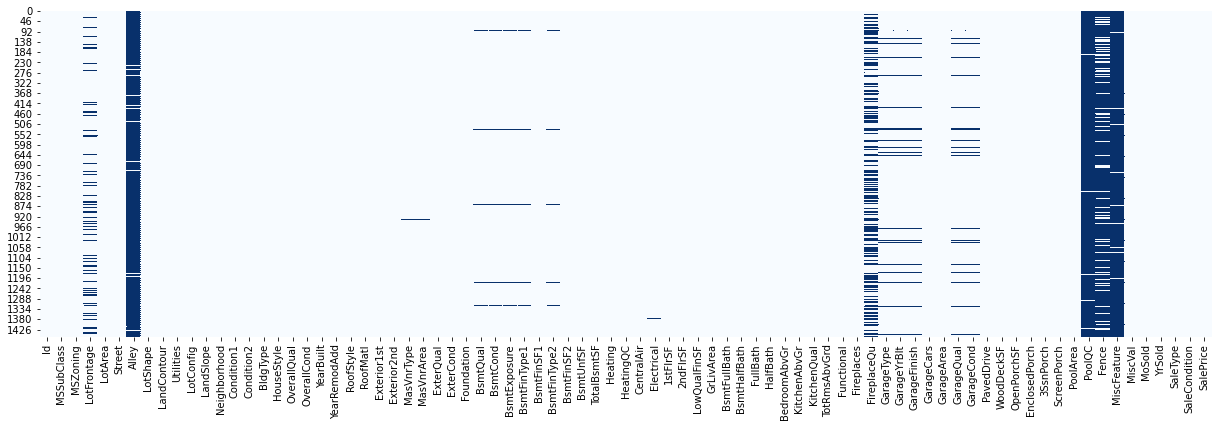

In [78]:
fig, ax = plt.subplots(figsize=(21,6))
sns.heatmap(df3.isna(),cbar=False,cmap="Blues")
plt.show()

We make the necessary changes for all MV columns in the Dataframe df2 with respect to object and other datatypes, respectively.

In [79]:
for y in df3_MV.iterrows():
    if y[1][2] == 'object' :
        df3[y[0]]= df3[y[0]].fillna('NA')
    else:
        df3[y[0]]= df3[y[0]].fillna(0)

for x in df2_MV.index:
    if df2_MV.loc[x]['DataType'] == 'object' :
        df2[x]= df2[x].fillna('NA')
    else:
        df2[x]=df2[x].fillna(0)

Dropping columns having 70% and more Missing Values

In [80]:
df3=df3.drop(columns=['Fence', 'Alley','PoolQC','MiscFeature'])
df3.shape

(1460, 77)

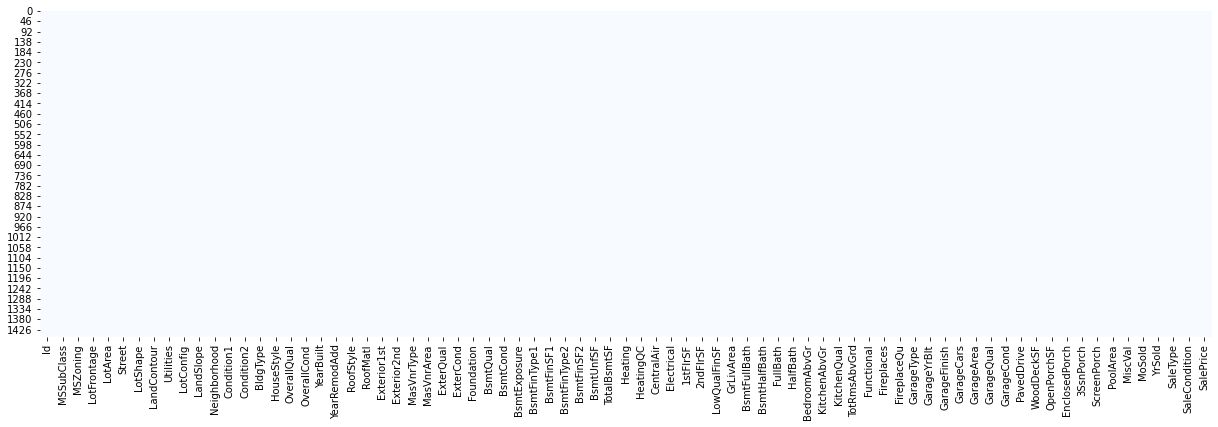

In [81]:
fig, ax = plt.subplots(figsize=(21,6))
sns.heatmap(df3.isna(),cbar=False,cmap="Blues")
plt.show()

Creating model from the data

In [82]:
#Storing categorized and numerical variables in different variables
df_cat=df3.select_dtypes(include=['object'])
df_num=df3.select_dtypes(exclude=['object'])

#Performing N-1 Dummy Encoding on categorized variables
df_cat_n=pd.get_dummies(df_cat,drop_first=True)

#Merging the two variables having numerical and n-1 categorised variables together
df_merge=pd.concat([df_num,df_cat_n],axis=1)

#Adding a Constant variable
df_merge=sm.add_constant(df_merge)

#Creating Target and Independent variables
df_target=df_merge['SalePrice']
df_ind=df_merge.drop(['SalePrice'], axis=1)

#Splitting Data into Training and Testing Data
x_train,x_test,y_train,y_test=train_test_split(df_ind, df_target, test_size=0.1, random_state=123)

model = sm.OLS(y_train,x_train,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     58.22
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:38:40   Log-Likelihood:                -14876.
No. Observations:                1314   AIC:                         3.028e+04
Df Residuals:                    1049   BIC:                         3.165e+04
Df Model:                         264                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -1.03e+06   1.01e+06     -1.016      0.310   -3.02e+06     9.6e+05
Id                        0.8112      1.631      0.497      0.619      -2.390       4.012
LotFrontage              10.0334     25.030      0.401      0.689     -39.082      59.149
LotArea                   0.7760      0.121      6.423      0.000       0.539       1.013
YearBuilt               361.0848     88.538      4.078      0.000     187.353     534.816
YearRemodAdd             89.9988     59.750      1.506      0.132     -27.245     207.243
MasVnrArea               17.9071      6.353      2.819      0.005       5.442      30.372
BsmtFinSF1               17.0359      3.021      5.640      0.000      11.109      22.963
BsmtFinSF2                6.5999      6.282      1.051      0.294      -5.727      18.927
BsmtUnfSF                -2.4647      2.924     -0.843      0.399      -8.203       3.273
TotalBsmtSF              21.1711      4.378      4.836      0.000      12.580      29.762
1stFlrSF                 18.7402      6.809      2.752      0.006       5.379      32.102
2ndFlrSF                 35.9374      5.873      6.119      0.000      24.413      47.462
LowQualFinSF            -24.8520     14.685     -1.692      0.091     -53.668       3.964
GrLivArea                29.8256      5.988      4.981      0.000      18.076      41.575
BsmtFullBath            837.6052   2060.948      0.406      0.685   -3206.444    4881.655
BsmtHalfBath            579.4057   3197.119      0.181      0.856   -5694.071    6852.883
FullBath               2308.4475   2368.899      0.974      0.330   -2339.872    6956.767
HalfBath                607.3596   2212.009      0.275      0.784   -3733.107    4947.826
BedroomAbvGr          -1603.3727   1486.218     -1.079      0.281   -4519.671    1312.926
KitchenAbvGr          -2.027e+04   7187.031     -2.821      0.005   -3.44e+04   -6172.259
TotRmsAbvGrd            501.6263   1007.297      0.498      0.619   -1474.921    2478.174
Fireplaces             7093.1273   2821.964      2.514      0.012    1555.791    1.26e+04
GarageYrBlt               8.4319     63.594      0.133      0.895    -116.354     133.217
GarageCars             3086.7778   2472.050      1.249      0.212   -1763.947    7937.503
GarageArea               16.4506      8.725      1.885      0.060      -0.670      33.571
WoodDeckSF                9.3732      6.187      1.515      0.130      -2.767      21.513
OpenPorchSF               5.9576     12.222      0.487      0.626     -18.024      29.940
EnclosedPorch            12.5900     13.626      0.924      0.356     -14.147      39.327
3SsnPorch                50.7566     22.657      2.240      0.025       6.299      95.215
ScreenPorch              31.3273     13.223      2.369      0.018       5.381      57.273
PoolArea               

In [83]:
# predict using Train set, 'SalePrice' using 'predict()' 
predict_train = model.predict(x_train)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_train = np.sqrt(mean_squared_error(predict_train,y_train)).round(2)

# predict using Test set, 'SalePrice' using 'predict()' 
predict_test = model.predict(x_test)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_test = np.sqrt(mean_squared_error(predict_test,y_test)).round(2)

In [84]:
Model='Removing columns having 70% or more MV and replacing others'
rSquared=model.rsquared
adjRSquared=model.rsquared_adj
rmseTrain=rmse_train
rmseTest=rmse_test
df_results.loc[Model]=[rSquared,adjRSquared,rmseTrain,rmseTest]
df_results

,R-Squared,Adjusted R-Squared,RMSE Train,RMSE Test
Removing all columns having MV,0.930444,0.917051,20838.02,23034.95
Removing all columns having MV(Normalisation),0.930444,0.917051,0.03,0.03
Removing all columns having MV(Standardization),0.930444,0.917051,0.26,0.29
Replacing all MV with proper values,0.937634,0.920959,19731.59,22490.55
Replacing all MV with proper values(Normalisation,0.937634,0.920959,0.03,0.03
Replacing all MV with proper values(Standardization),0.937634,0.920959,0.25,0.28
Removing columns having 70% or more MV and replacing others,0.936113,0.920034,19970.80,22557.73


# --------------------------------------------------------------------------------------------------------------------

# 3.1 Removing all Columns having more than 70% MV and Replacing others with Proper Values and performing Normalisation

Reading the 'HousePrices.csv' file and storing it in a Dataframe

In [3]:
df3_N=pd.read_csv('HousePrices.csv')

Converting the following to object type variables

In [4]:
df3_N['MSSubClass']=df3_N['MSSubClass'].astype(object)
df3_N['OverallQual']=df3_N['OverallQual'].astype(object)
df3_N['OverallCond']=df3_N['OverallCond'].astype(object)

Getting the Dimensions of the Dataframe

In [5]:
df3_N.shape

(1460, 81)

Storing the percentage values of missing values greater then 0 in Descending order

In [6]:
#Creating a New Dataframe to store MV in
df3_N_MV=pd.DataFrame()

#Creating new columns to add Number and Percentage of Missing Values for the variables
df3_N_MV['Number of MV'] = df3_N.isna().sum()[df3_N.isna().sum()>0]
df3_N_MV['Percentage of MV'] = (df3_N.isna().mean()* 100).round(2)[(df3_N.isna().mean()* 100).round(2)>0]
df3_N_MV['DataType']= df3_N.dtypes
df3_N_MV=df3_N_MV.sort_values(by=['Percentage of MV'],ascending=False)
df3_N_MV

,Number of MV,Percentage of MV,DataType
PoolQC,1453,99.52,object
MiscFeature,1406,96.30,object
Alley,1369,93.77,object
Fence,1179,80.75,object
FireplaceQu,690,47.26,object
LotFrontage,259,17.74,float64
GarageType,81,5.55,object
GarageYrBlt,81,5.55,float64
GarageFinish,81,5.55,object
GarageQual,81,5.55,object


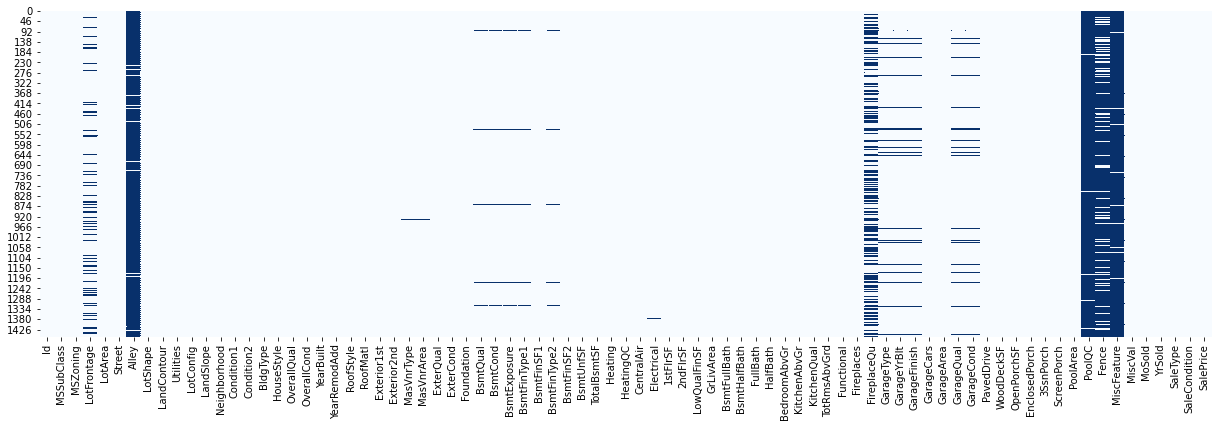

In [7]:
fig, ax = plt.subplots(figsize=(21,6))
sns.heatmap(df3_N.isna(),cbar=False,cmap="Blues")
plt.show()

We make the necessary changes for all MV columns in the Dataframe df2 with respect to object and other datatypes, respectively.

In [8]:
for y in df3_N_MV.iterrows():
    if y[1][2] == 'object' :
        df3_N[y[0]]= df3_N[y[0]].fillna('NA')
    else:
        df3_N[y[0]]= df3_N[y[0]].fillna(0)

Dropping columns having 70% and more Missing Values

In [9]:
df3_N=df3_N.drop(columns=['Fence', 'Alley','PoolQC','MiscFeature'])
df3_N.shape

(1460, 77)

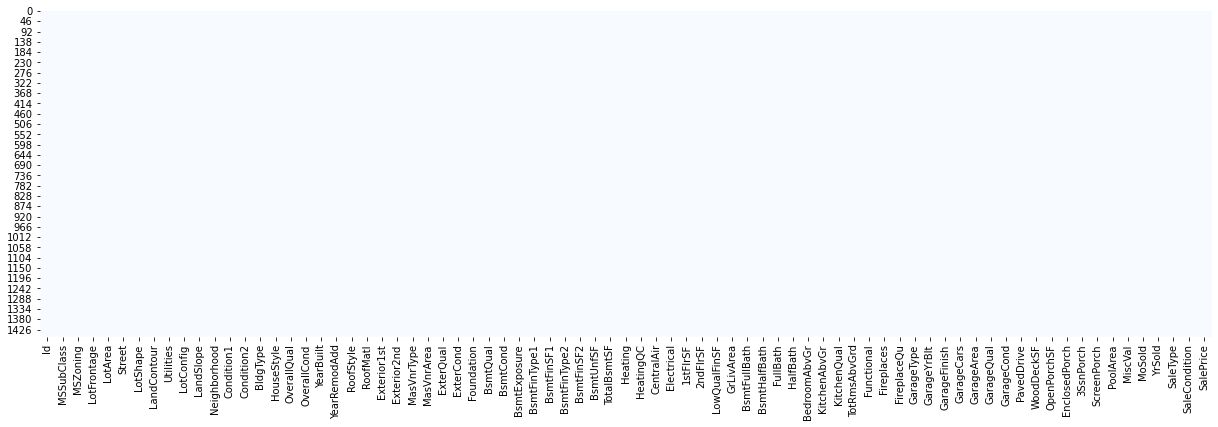

In [10]:
fig, ax = plt.subplots(figsize=(21,6))
sns.heatmap(df3_N.isna(),cbar=False,cmap="Blues")
plt.show()

Creating model from the data

In [11]:
#Storing categorized and numerical variables in different variables
df_cat=df3_N.select_dtypes(include=['object'])
df_num=df3_N.select_dtypes(exclude=['object'])

#Performing Normalisation on the data in df_num(numerical data)
df_num_normalisation = pd.DataFrame(MinMaxScaler().fit_transform(df_num.values), columns=df_num.columns, index=df_num.index)
df_num=df_num_normalisation

#Performing N-1 Dummy Encoding on categorized variables
df_cat_n=pd.get_dummies(df_cat,drop_first=True)

#Merging the two variables having numerical and n-1 categorised variables together
df_merge=pd.concat([df_num,df_cat_n],axis=1)

#Adding a Constant variable
df_merge=sm.add_constant(df_merge)

#Creating Target and Independent variables
df_target=df_merge['SalePrice']
df_ind=df_merge.drop(['SalePrice'], axis=1)

#Splitting Data into Training and Testing Data
x_train,x_test,y_train,y_test=train_test_split(df_ind, df_target, test_size=0.1, random_state=123)

model = sm.OLS(y_train,x_train,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     58.22
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:27:29   Log-Likelihood:                 2846.4
No. Observations:                1314   AIC:                            -5163.
Df Residuals:                    1049   BIC:                            -3790.
Df Model:                         264                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.0529      0.183     -5.765      0.000      -1.411      -0.695
Id                        0.0016      0.003      0.497      0.619      -0.005       0.008
LotFrontage               0.0044      0.011      0.401      0.689      -0.017       0.026
LotArea                   0.2306      0.036      6.423      0.000       0.160       0.301
YearBuilt                 0.0692      0.017      4.078      0.000       0.036       0.102
YearRemodAdd              0.0075      0.005      1.506      0.132      -0.002       0.017
MasVnrArea                0.0398      0.014      2.819      0.005       0.012       0.067
BsmtFinSF1                0.1587      0.023      6.937      0.000       0.114       0.204
BsmtFinSF2                0.0201      0.017      1.183      0.237      -0.013       0.053
BsmtUnfSF                 0.0024      0.010      0.239      0.812      -0.018       0.022
TotalBsmtSF               0.1524      0.024      6.327      0.000       0.105       0.200
1stFlrSF                  0.1531      0.023      6.759      0.000       0.109       0.198
2ndFlrSF                  0.1219      0.016      7.525      0.000       0.090       0.154
LowQualFinSF             -0.0145      0.016     -0.926      0.355      -0.045       0.016
GrLivArea                 0.1715      0.017      9.845      0.000       0.137       0.206
BsmtFullBath              0.0035      0.009      0.406      0.685      -0.013       0.020
BsmtHalfBath              0.0016      0.009      0.181      0.856      -0.016       0.019
FullBath                  0.0096      0.010      0.974      0.330      -0.010       0.029
HalfBath                  0.0017      0.006      0.275      0.784      -0.010       0.014
BedroomAbvGr             -0.0178      0.017     -1.079      0.281      -0.050       0.015
KitchenAbvGr             -0.0845      0.030     -2.821      0.005      -0.143      -0.026
TotRmsAbvGrd              0.0084      0.017      0.498      0.619      -0.025       0.041
Fireplaces                0.0296      0.012      2.514      0.012       0.006       0.053
GarageYrBlt               0.0235      0.178      0.133      0.895      -0.325       0.372
GarageCars                0.0171      0.014      1.249      0.212      -0.010       0.044
GarageArea                0.0324      0.017      1.885      0.060      -0.001       0.066
WoodDeckSF                0.0112      0.007      1.515      0.130      -0.003       0.026
OpenPorchSF               0.0045      0.009      0.487      0.626      -0.014       0.023
EnclosedPorch             0.0097      0.010      0.924      0.356      -0.011       0.030
3SsnPorch                 0.0358      0.016      2.240      0.025       0.004       0.067
ScreenPorch               0.0209      0.009      2.369      0.018       0.004       0.038
PoolArea               

In [12]:
# predict using Train set, 'SalePrice' using 'predict()' 
predict_train = model.predict(x_train)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_train = np.sqrt(mean_squared_error(predict_train,y_train)).round(2)

# predict using Test set, 'SalePrice' using 'predict()' 
predict_test = model.predict(x_test)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_test = np.sqrt(mean_squared_error(predict_test,y_test)).round(2)

In [95]:
Model='Removing columns having 70% or more MV and replacing others(Normalisation)'
rSquared=model.rsquared
adjRSquared=model.rsquared_adj
rmseTrain=rmse_train
rmseTest=rmse_test
df_results.loc[Model]=[rSquared,adjRSquared,rmseTrain,rmseTest]
df_results

,R-Squared,Adjusted R-Squared,RMSE Train,RMSE Test
Removing all columns having MV,0.930444,0.917051,20838.02,23034.95
Removing all columns having MV(Normalisation),0.930444,0.917051,0.03,0.03
Removing all columns having MV(Standardization),0.930444,0.917051,0.26,0.29
Replacing all MV with proper values,0.937634,0.920959,19731.59,22490.55
Replacing all MV with proper values(Normalisation,0.937634,0.920959,0.03,0.03
Replacing all MV with proper values(Standardization),0.937634,0.920959,0.25,0.28
Removing columns having 70% or more MV and replacing others,0.936113,0.920034,19970.80,22557.73
Removing columns having 70% or more MV and replacing others(Normalisation),0.936113,0.920034,0.03,0.03


# --------------------------------------------------------------------------------------------------------------------

# 3.2 Removing all Columns having more than 70% MV and Replacing others with Proper Values and performing Standardization

Reading the 'HousePrices.csv' file and storing it in a Dataframe

In [96]:
df3_S=pd.read_csv('HousePrices.csv')

Converting the following to object type variables

In [97]:
df3_S['MSSubClass']=df3_S['MSSubClass'].astype(object)
df3_S['OverallQual']=df3_S['OverallQual'].astype(object)
df3_S['OverallCond']=df3_S['OverallCond'].astype(object)

Getting the Dimensions of the Dataframe

In [98]:
df3_S.shape

(1460, 81)

Storing the percentage values of missing values greater then 0 in Descending order

In [99]:
#Creating a New Dataframe to store MV in
df3_S_MV=pd.DataFrame()

#Creating new columns to add Number and Percentage of Missing Values for the variables
df3_S_MV['Number of MV'] = df3_S.isna().sum()[df3_S.isna().sum()>0]
df3_S_MV['Percentage of MV'] = (df3_S.isna().mean()* 100).round(2)[(df3_S.isna().mean()* 100).round(2)>0]
df3_S_MV['DataType']= df3_S.dtypes
df3_S_MV=df3_S_MV.sort_values(by=['Percentage of MV'],ascending=False)
df3_S_MV

,Number of MV,Percentage of MV,DataType
PoolQC,1453,99.52,object
MiscFeature,1406,96.30,object
Alley,1369,93.77,object
Fence,1179,80.75,object
FireplaceQu,690,47.26,object
LotFrontage,259,17.74,float64
GarageType,81,5.55,object
GarageYrBlt,81,5.55,float64
GarageFinish,81,5.55,object
GarageQual,81,5.55,object


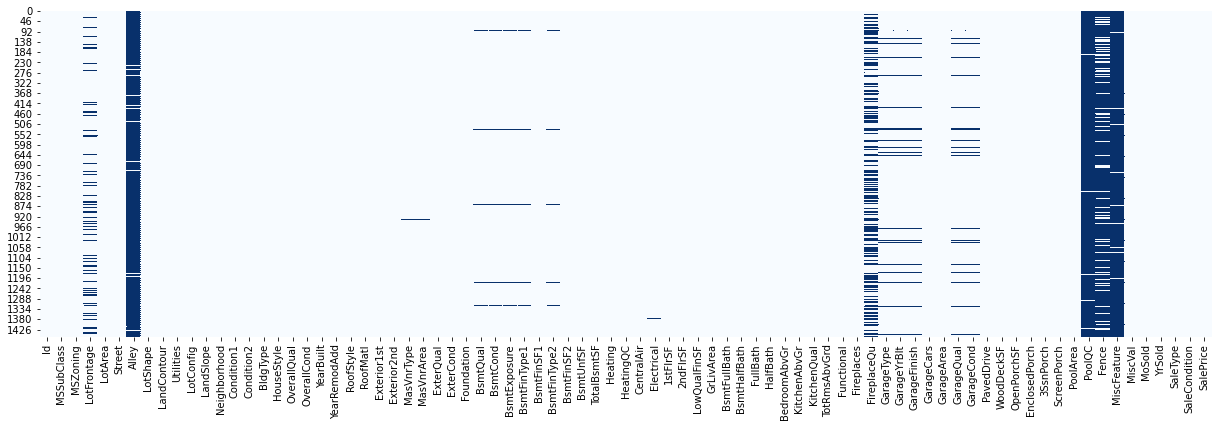

In [100]:
fig, ax = plt.subplots(figsize=(21,6))
sns.heatmap(df3_S.isna(),cbar=False,cmap="Blues")
plt.show()

We make the necessary changes for all MV columns in the Dataframe df2 with respect to object and other datatypes, respectively.

In [101]:
for y in df3_S_MV.iterrows():
    if y[1][2] == 'object' :
        df3_S[y[0]]= df3_S[y[0]].fillna('NA')
    else:
        df3_S[y[0]]= df3_S[y[0]].fillna(0)

Dropping columns having 70% and more Missing Values

In [102]:
df3_S=df3_S.drop(columns=['Fence', 'Alley','PoolQC','MiscFeature'])
df3_S.shape

(1460, 77)

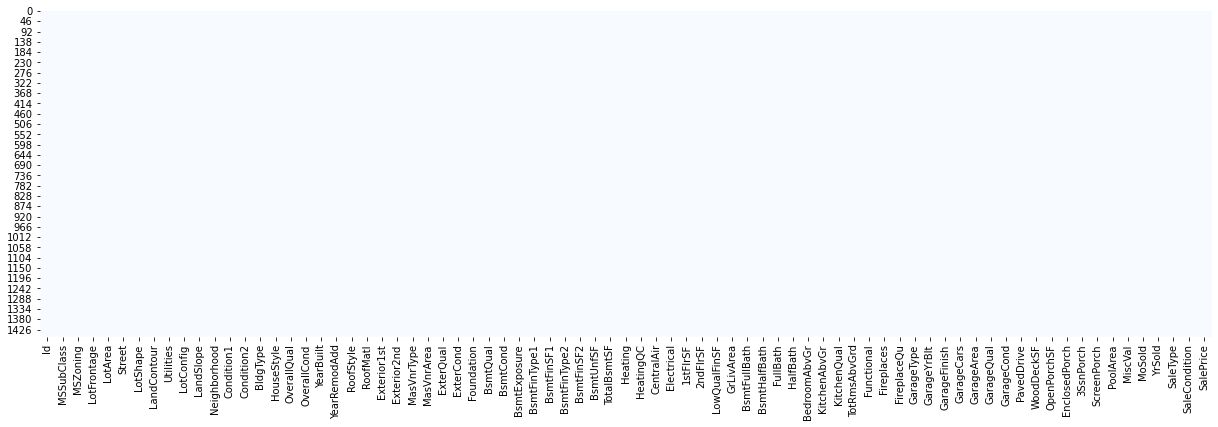

In [103]:
fig, ax = plt.subplots(figsize=(21,6))
sns.heatmap(df3_S.isna(),cbar=False,cmap="Blues")
plt.show()

Creating model from the data

In [104]:
#Storing categorized and numerical variables in different variables
df_cat=df3_S.select_dtypes(include=['object'])
df_num=df3_S.select_dtypes(exclude=['object'])

#Performing Normalisation on the data in df_num(numerical data)
df_num_normalisation = pd.DataFrame(MinMaxScaler().fit_transform(df_num.values), columns=df_num.columns, index=df_num.index)
df_num=df_num_normalisation

#Performing N-1 Dummy Encoding on categorized variables
df_cat_n=pd.get_dummies(df_cat,drop_first=True)

#Merging the two variables having numerical and n-1 categorised variables together
df_merge=pd.concat([df_num,df_cat_n],axis=1)

#Adding a Constant variable
df_merge=sm.add_constant(df_merge)

#Creating Target and Independent variables
df_target=df_merge['SalePrice']
df_ind=df_merge.drop(['SalePrice'], axis=1)

#Splitting Data into Training and Testing Data
x_train,x_test,y_train,y_test=train_test_split(df_ind, df_target, test_size=0.1, random_state=123)

model = sm.OLS(y_train,x_train,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     58.22
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:38:44   Log-Likelihood:                 2846.4
No. Observations:                1314   AIC:                            -5163.
Df Residuals:                    1049   BIC:                            -3790.
Df Model:                         264                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.0529      0.183     -5.765      0.000      -1.411      -0.695
Id                        0.0016      0.003      0.497      0.619      -0.005       0.008
LotFrontage               0.0044      0.011      0.401      0.689      -0.017       0.026
LotArea                   0.2306      0.036      6.423      0.000       0.160       0.301
YearBuilt                 0.0692      0.017      4.078      0.000       0.036       0.102
YearRemodAdd              0.0075      0.005      1.506      0.132      -0.002       0.017
MasVnrArea                0.0398      0.014      2.819      0.005       0.012       0.067
BsmtFinSF1                0.1587      0.023      6.937      0.000       0.114       0.204
BsmtFinSF2                0.0201      0.017      1.183      0.237      -0.013       0.053
BsmtUnfSF                 0.0024      0.010      0.239      0.812      -0.018       0.022
TotalBsmtSF               0.1524      0.024      6.327      0.000       0.105       0.200
1stFlrSF                  0.1531      0.023      6.759      0.000       0.109       0.198
2ndFlrSF                  0.1219      0.016      7.525      0.000       0.090       0.154
LowQualFinSF             -0.0145      0.016     -0.926      0.355      -0.045       0.016
GrLivArea                 0.1715      0.017      9.845      0.000       0.137       0.206
BsmtFullBath              0.0035      0.009      0.406      0.685      -0.013       0.020
BsmtHalfBath              0.0016      0.009      0.181      0.856      -0.016       0.019
FullBath                  0.0096      0.010      0.974      0.330      -0.010       0.029
HalfBath                  0.0017      0.006      0.275      0.784      -0.010       0.014
BedroomAbvGr             -0.0178      0.017     -1.079      0.281      -0.050       0.015
KitchenAbvGr             -0.0845      0.030     -2.821      0.005      -0.143      -0.026
TotRmsAbvGrd              0.0084      0.017      0.498      0.619      -0.025       0.041
Fireplaces                0.0296      0.012      2.514      0.012       0.006       0.053
GarageYrBlt               0.0235      0.178      0.133      0.895      -0.325       0.372
GarageCars                0.0171      0.014      1.249      0.212      -0.010       0.044
GarageArea                0.0324      0.017      1.885      0.060      -0.001       0.066
WoodDeckSF                0.0112      0.007      1.515      0.130      -0.003       0.026
OpenPorchSF               0.0045      0.009      0.487      0.626      -0.014       0.023
EnclosedPorch             0.0097      0.010      0.924      0.356      -0.011       0.030
3SsnPorch                 0.0358      0.016      2.240      0.025       0.004       0.067
ScreenPorch               0.0209      0.009      2.369      0.018       0.004       0.038
PoolArea               

In [105]:
# predict using Train set, 'SalePrice' using 'predict()' 
predict_train = model.predict(x_train)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_train = np.sqrt(mean_squared_error(predict_train,y_train)).round(2)

# predict using Test set, 'SalePrice' using 'predict()' 
predict_test = model.predict(x_test)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_test = np.sqrt(mean_squared_error(predict_test,y_test)).round(2)

In [106]:
Model='Removing columns having 70% or more MV and replacing others(Standardization)'
rSquared=model.rsquared
adjRSquared=model.rsquared_adj
rmseTrain=rmse_train
rmseTest=rmse_test
df_results.loc[Model]=[rSquared,adjRSquared,rmseTrain,rmseTest]
df_results

,R-Squared,Adjusted R-Squared,RMSE Train,RMSE Test
Removing all columns having MV,0.930444,0.917051,20838.02,23034.95
Removing all columns having MV(Normalisation),0.930444,0.917051,0.03,0.03
Removing all columns having MV(Standardization),0.930444,0.917051,0.26,0.29
Replacing all MV with proper values,0.937634,0.920959,19731.59,22490.55
Replacing all MV with proper values(Normalisation,0.937634,0.920959,0.03,0.03
Replacing all MV with proper values(Standardization),0.937634,0.920959,0.25,0.28
Removing columns having 70% or more MV and replacing others,0.936113,0.920034,19970.80,22557.73
Removing columns having 70% or more MV and replacing others(Normalisation),0.936113,0.920034,0.03,0.03
Removing columns having 70% or more MV and replacing others(Standardization),0.936113,0.920034,0.03,0.03


# --------------------------------------------------------------------------------------------------------------------

# 4. Replacing values with Mean of the Data

Reading the 'HousePrices.csv' file and storing it in a Dataframe

In [15]:
df4=pd.read_csv('HousePrices.csv')

Converting the following to object type variables

In [16]:
df4['MSSubClass']=df4['MSSubClass'].astype(object)
df4['OverallQual']=df4['OverallQual'].astype(object)
df4['OverallCond']=df4['OverallCond'].astype(object)

Getting the Dimensions of the Dataframe

In [17]:
df4.shape

(1460, 81)

Storing the percentage values of missing values greater then 0 in Descending order

In [18]:
#Creating a New Dataframe to store MV in
df4_MV=pd.DataFrame()

#Creating new columns to add Number and Percentage of Missing Values for the variables
df4_MV['Number of MV'] = df4.isna().sum()[df4.isna().sum()>0]
df4_MV['Percentage of MV'] = (df4.isna().mean()* 100).round(2)[(df4.isna().mean()* 100).round(2)>0]
df4_MV['DataType']= df4.dtypes
df4_MV=df4_MV.sort_values(by=['Percentage of MV'],ascending=False)
df4_MV

,Number of MV,Percentage of MV,DataType
PoolQC,1453,99.52,object
MiscFeature,1406,96.30,object
Alley,1369,93.77,object
Fence,1179,80.75,object
FireplaceQu,690,47.26,object
LotFrontage,259,17.74,float64
GarageType,81,5.55,object
GarageYrBlt,81,5.55,float64
GarageFinish,81,5.55,object
GarageQual,81,5.55,object


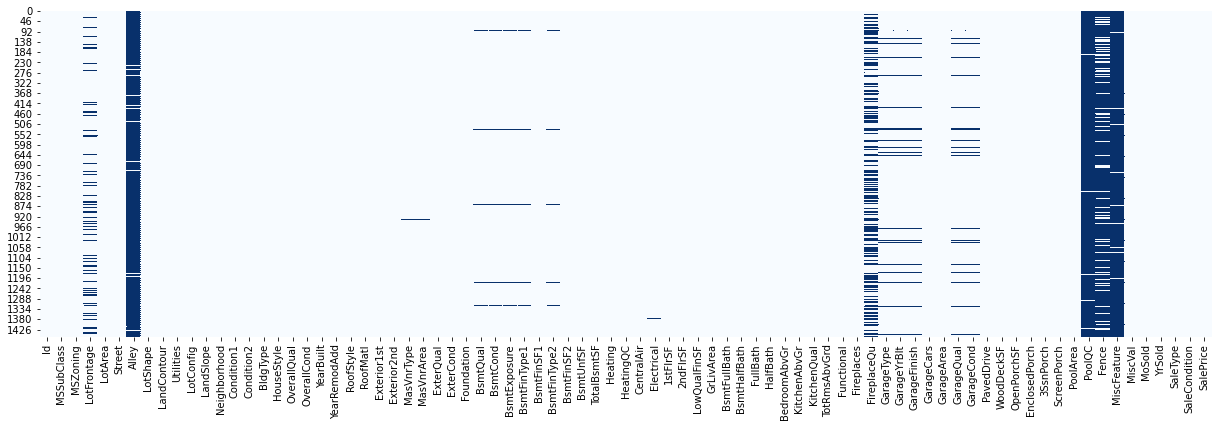

In [21]:
fig, ax = plt.subplots(figsize=(21,6))
sns.heatmap(df4.isna(),cbar=False,cmap="Blues")
plt.show()

We make the necessary changes for all MV columns in the Dataframe df2 with respect to object and other datatypes, respectively.

for y in df3_MV.iterrows():  
    if y[1][2] == 'object' :  
        df3[y[0]]= df3[y[0]].fillna('NA')  
    else:  
        df3[y[0]]= df3[y[0]].fillna(0)  

for x in df2_MV.index:
    if df2_MV.loc[x]['DataType'] == 'object' :
        df2[x]= df2[x].fillna('NA')
    else:
        df2[x]=df2[x].fillna(0)

Dropping columns having 70% and more Missing Values

In [80]:
df3=df3.drop(columns=['Fence', 'Alley','PoolQC','MiscFeature'])
df3.shape

(1460, 77)

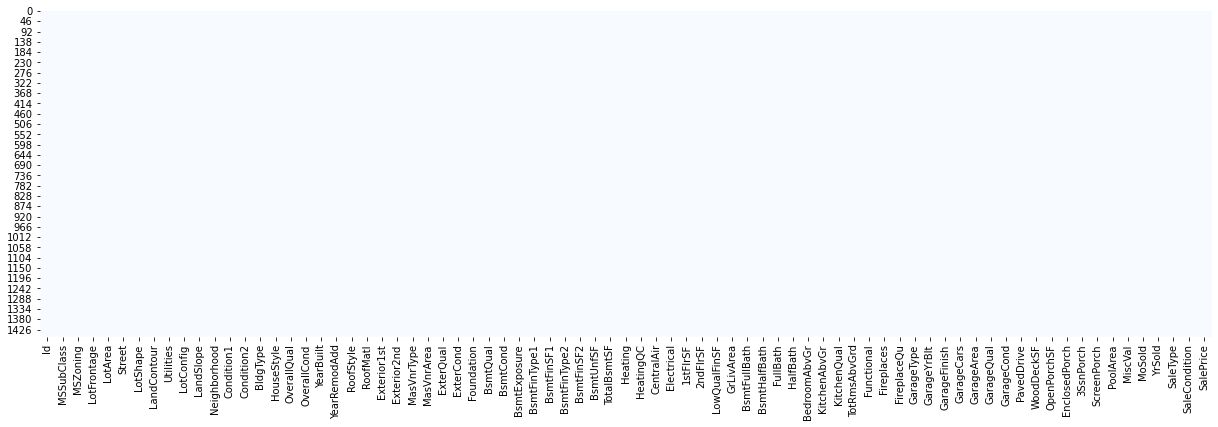

In [81]:
fig, ax = plt.subplots(figsize=(21,6))
sns.heatmap(df3.isna(),cbar=False,cmap="Blues")
plt.show()

Creating model from the data

In [82]:
#Storing categorized and numerical variables in different variables
df_cat=df3.select_dtypes(include=['object'])
df_num=df3.select_dtypes(exclude=['object'])

#Performing N-1 Dummy Encoding on categorized variables
df_cat_n=pd.get_dummies(df_cat,drop_first=True)

#Merging the two variables having numerical and n-1 categorised variables together
df_merge=pd.concat([df_num,df_cat_n],axis=1)

#Adding a Constant variable
df_merge=sm.add_constant(df_merge)

#Creating Target and Independent variables
df_target=df_merge['SalePrice']
df_ind=df_merge.drop(['SalePrice'], axis=1)

#Splitting Data into Training and Testing Data
x_train,x_test,y_train,y_test=train_test_split(df_ind, df_target, test_size=0.1, random_state=123)

model = sm.OLS(y_train,x_train,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     58.22
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:38:40   Log-Likelihood:                -14876.
No. Observations:                1314   AIC:                         3.028e+04
Df Residuals:                    1049   BIC:                         3.165e+04
Df Model:                         264                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -1.03e+06   1.01e+06     -1.016      0.310   -3.02e+06     9.6e+05
Id                        0.8112      1.631      0.497      0.619      -2.390       4.012
LotFrontage              10.0334     25.030      0.401      0.689     -39.082      59.149
LotArea                   0.7760      0.121      6.423      0.000       0.539       1.013
YearBuilt               361.0848     88.538      4.078      0.000     187.353     534.816
YearRemodAdd             89.9988     59.750      1.506      0.132     -27.245     207.243
MasVnrArea               17.9071      6.353      2.819      0.005       5.442      30.372
BsmtFinSF1               17.0359      3.021      5.640      0.000      11.109      22.963
BsmtFinSF2                6.5999      6.282      1.051      0.294      -5.727      18.927
BsmtUnfSF                -2.4647      2.924     -0.843      0.399      -8.203       3.273
TotalBsmtSF              21.1711      4.378      4.836      0.000      12.580      29.762
1stFlrSF                 18.7402      6.809      2.752      0.006       5.379      32.102
2ndFlrSF                 35.9374      5.873      6.119      0.000      24.413      47.462
LowQualFinSF            -24.8520     14.685     -1.692      0.091     -53.668       3.964
GrLivArea                29.8256      5.988      4.981      0.000      18.076      41.575
BsmtFullBath            837.6052   2060.948      0.406      0.685   -3206.444    4881.655
BsmtHalfBath            579.4057   3197.119      0.181      0.856   -5694.071    6852.883
FullBath               2308.4475   2368.899      0.974      0.330   -2339.872    6956.767
HalfBath                607.3596   2212.009      0.275      0.784   -3733.107    4947.826
BedroomAbvGr          -1603.3727   1486.218     -1.079      0.281   -4519.671    1312.926
KitchenAbvGr          -2.027e+04   7187.031     -2.821      0.005   -3.44e+04   -6172.259
TotRmsAbvGrd            501.6263   1007.297      0.498      0.619   -1474.921    2478.174
Fireplaces             7093.1273   2821.964      2.514      0.012    1555.791    1.26e+04
GarageYrBlt               8.4319     63.594      0.133      0.895    -116.354     133.217
GarageCars             3086.7778   2472.050      1.249      0.212   -1763.947    7937.503
GarageArea               16.4506      8.725      1.885      0.060      -0.670      33.571
WoodDeckSF                9.3732      6.187      1.515      0.130      -2.767      21.513
OpenPorchSF               5.9576     12.222      0.487      0.626     -18.024      29.940
EnclosedPorch            12.5900     13.626      0.924      0.356     -14.147      39.327
3SsnPorch                50.7566     22.657      2.240      0.025       6.299      95.215
ScreenPorch              31.3273     13.223      2.369      0.018       5.381      57.273
PoolArea               

In [83]:
# predict using Train set, 'SalePrice' using 'predict()' 
predict_train = model.predict(x_train)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_train = np.sqrt(mean_squared_error(predict_train,y_train)).round(2)

# predict using Test set, 'SalePrice' using 'predict()' 
predict_test = model.predict(x_test)

# Calculating 'rmse' using 'mean_squared_error()'
rmse_test = np.sqrt(mean_squared_error(predict_test,y_test)).round(2)

In [84]:
Model='Removing columns having 70% or more MV and replacing others'
rSquared=model.rsquared
adjRSquared=model.rsquared_adj
rmseTrain=rmse_train
rmseTest=rmse_test
df_results.loc[Model]=[rSquared,adjRSquared,rmseTrain,rmseTest]
df_results

,R-Squared,Adjusted R-Squared,RMSE Train,RMSE Test
Removing all columns having MV,0.930444,0.917051,20838.02,23034.95
Removing all columns having MV(Normalisation),0.930444,0.917051,0.03,0.03
Removing all columns having MV(Standardization),0.930444,0.917051,0.26,0.29
Replacing all MV with proper values,0.937634,0.920959,19731.59,22490.55
Replacing all MV with proper values(Normalisation,0.937634,0.920959,0.03,0.03
Replacing all MV with proper values(Standardization),0.937634,0.920959,0.25,0.28
Removing columns having 70% or more MV and replacing others,0.936113,0.920034,19970.80,22557.73


# --------------------------------------------------------------------------------------------------------------------

PoolQC - Pool Quality not required (Removal)  
MiscFeature - Miscellaneous features (Set to 0, Avg, etc)  
Alley -  
Fence -  
FireplaceQu -  
LotFrontage -  
GarageType -  
GarageYrBuilt -  
GarageFinish -  
GarageQual -  
GarageCond -  
BsmtExposure -  
BsmtFinType2 -  
BsmtFinType1 -  
BsmtCond -  
BsmtQual -  
MasVnrArea -  
MasVnrType -  
Electrical -  